In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## ***Loading Data***

In [3]:
df = pd.read_csv("netflix.csv")   # Data from Kaggle
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## ***Feature / Data Exploration***

*   df info, df describe
*   List unique values
*   List Observations / Column format (dtype) / Missing Values



1.   **Problem Statement**
2.   **Observations on data**
3.   **Non-Graphical Analysis: Value counts and unique attributes**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.shape

(8807, 12)

In [6]:
df["type"].unique()

array(['Movie', 'TV Show'], dtype=object)

In [7]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [8]:
df["release_year"].unique().min()

1925

In [9]:
df["release_year"].unique().max()

2021

In [10]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [11]:
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


**OBSERVATIONS**

*   8807 samples (shows) & 12 features
*   Only 2 types - Movies / TV Shows
*   Movies in the list have been released from 1925 to 2021
*   75% of movies in MediaStreamCompany are released after 2013
*   Last 3 rating (74min, 84 min, 66 min) appears to be incorrectly mentioned in rating columns hence need to be updated in duartion column
*   There are 6131 movies and 2676 TV Show listed

**FORMATTING**

*   date_added to be converted to date format
*   duration to be converted to minutes for movies / int for TV shows
*   Movies duration > in minutes & TV shows duration > in Seasons

**MISSING**

*   director, cast, country have MANY missing values
*   date_added, rating, duration have FEW missing values



## ***Data Pre-processing / Handling***

*   Handling null values
*   Updating data type of Series
*   Un-nesting the columns Cast(Actor), Director, Country

*   **Note: Pre-processing involves unnesting of the data in columns like Actor, Director, Country**
5.  **Missing Value & Outlier check (Treatment optional)**

## ***Handling Null and Missing Values***

In [12]:
df.isnull().sum(axis = 0)

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
df["cast"].fillna("Unknown Actor", inplace = True)

In [14]:
df["country"].fillna("Unknown Country", inplace = True)

In [15]:
df["director"].fillna("Unknown Director", inplace = True)
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown Country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Actor,Unknown Country,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [16]:
df.loc[df["duration"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [17]:
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [18]:
df[df["rating"].isin(['74 min','84 min','66 min'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


*   **Missing durations are of type 'Movie'**
*   **Missing values of 'duration' are updated in 'ratings' column**
*   **Hence needs to be corrected because ratings column cannot have the rating in minutes**

In [19]:
df["duration"].loc[5541] = df["rating"].loc[5541]
df["rating"].loc[5541] = np.nan

df["duration"].loc[5794] = df["rating"].loc[5794]
df["rating"].loc[5794] = np.nan

df["duration"].loc[5813] = df["rating"].loc[5813]
df["rating"].loc[5813] = np.nan

<ipython-input-19-da3a509135a3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["duration"].loc[5541] = df["rating"].loc[5541]
<ipython-input-19-da3a509135a3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["rating"].loc[5541] = np.nan
<ipython-input-19-da3a509135a3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["duration"].loc[5794] = df["rating"].loc[5794]
<ipython-input-19-da3a509135a3>:5: SettingWithCopyWarning: 
A va

In [20]:
df.loc[[5541,5794,5813]]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...


In [21]:
data = df.copy()
data["duration"] = data["duration"].str.split(pat = " ", n = 1, expand = True).loc[::,0]
data

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown Country,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Actor,Unknown Country,"July 1, 2019",2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [22]:
data["duration"] = data["duration"].astype("int")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8807 non-null   int64 
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(2), object(10)
memory usage: 825.8+ KB


In [23]:
df["duration"] = df["duration"].str.split(pat = " ", n = 1, expand = True).loc[::,0]
df["duration"] = df["duration"].astype("int")
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,"September 25, 2021",2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,"September 24, 2021",2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown Country,"September 24, 2021",2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Actor,Unknown Country,"July 1, 2019",2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      8807 non-null   object
 4   cast          8807 non-null   object
 5   country       8807 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8800 non-null   object
 9   duration      8807 non-null   int64 
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(2), object(10)
memory usage: 825.8+ KB


In [25]:
df[df["rating"].isna()] # 5541,5794,5813,5989,6827,7312,7537
df["rating"].fillna("Not-Available", inplace = True)
df["rating"].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', 'Not-Available', 'NR', 'TV-Y7-FV', 'UR'],
      dtype=object)

In [26]:
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,listed_in,description
count,8807,8807,8807,8807,8807,8807,8797,8807,8807,8807
unique,8807,2,8807,4529,7693,749,1767,15,514,8775
top,s1,Movie,Dick Johnson Is Dead,Unknown Director,Unknown Actor,United States,"January 1, 2020",TV-MA,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2634,825,2818,109,3207,362,4


In [27]:
df[df["date_added"].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unknown Director,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unknown Director,Anthony Bourdain,United States,NaN,2018,TV-PG,5,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unknown Director,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unknown Director,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unknown Director,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
7196,s7197,TV Show,Kikoriki,Unknown Director,Igor Dmitriev,Unknown Country,NaN,2010,TV-Y,2,Kids' TV,A wacky rabbit and his gang of animal pals hav...
7254,s7255,TV Show,La Familia P. Luche,Unknown Director,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
7406,s7407,TV Show,Maron,Unknown Director,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
7847,s7848,TV Show,Red vs. Blue,Unknown Director,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
8182,s8183,TV Show,The Adventures of Figaro Pho,Unknown Director,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [28]:
df["date_added"].value_counts()

date_added
January 1, 2020      109
November 1, 2019      89
March 1, 2018         75
December 31, 2019     74
October 1, 2018       71
                    ... 
December 4, 2016       1
November 21, 2016      1
November 19, 2016      1
November 17, 2016      1
January 11, 2020       1
Name: count, Length: 1767, dtype: int64

In [29]:
df["date_added"].fillna("January 1, 2020", inplace = True)

In [31]:
# Strip any leading/trailing whitespace from the 'date_added' column before converting to datetime
df["date_added"] = df["date_added"].str.strip()
df["date_added"] = pd.to_datetime(df["date_added"], format='%B %d, %Y')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   show_id       8807 non-null   object        
 1   type          8807 non-null   object        
 2   title         8807 non-null   object        
 3   director      8807 non-null   object        
 4   cast          8807 non-null   object        
 5   country       8807 non-null   object        
 6   date_added    8807 non-null   datetime64[ns]
 7   release_year  8807 non-null   int64         
 8   rating        8807 non-null   object        
 9   duration      8807 non-null   int64         
 10  listed_in     8807 non-null   object        
 11  description   8807 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 825.8+ KB


In [33]:
df.describe()

,date_added,release_year,duration
count,8807,8807.000000,8807.000000
mean,2019-05-17 12:13:09.735437824,2014.180198,69.848530
min,2008-01-01 00:00:00,1925.000000,1.000000
25%,2018-04-06 00:00:00,2013.000000,2.000000
50%,2019-07-04 00:00:00,2017.000000,88.000000
75%,2020-08-18 00:00:00,2019.000000,106.000000
max,2021-09-25 00:00:00,2021.000000,312.000000
std,NaN,8.819312,50.806431


In [34]:
df.describe(include = object)

,show_id,type,title,director,cast,country,rating,listed_in,description
count,8807,8807,8807,8807,8807,8807,8807,8807,8807
unique,8807,2,8807,4529,7693,749,15,514,8775
top,s1,Movie,Dick Johnson Is Dead,Unknown Director,Unknown Actor,United States,TV-MA,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,2634,825,2818,3207,362,4


In [35]:
df["listed_in"].nunique()

514

In [36]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown Country,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Actor,Unknown Country,2019-07-01,2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


## ***Unnesting data using Split & Explode***

**Un-nesting columns Director, Cast, Country, listed_in : split & explode**

In [37]:
data_unnest = df.copy()
data_unnest

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown Country,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Actor,Unknown Country,2019-07-01,2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [38]:
# split authors
data_unnest['director'] = data_unnest['director'].str.split(', ')

# explode the column (with a fresh 0, 1... index)
data_unnest = data_unnest.explode('director', ignore_index=True)
data_unnest

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown Country,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
9607,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
9608,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Actor,Unknown Country,2019-07-01,2018,TV-Y7,2,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
9609,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
9610,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [39]:
# split authors
data_unnest['cast'] = data_unnest['cast'].str.split(', ')

# explode the column (with a fresh 0, 1... index)
data_unnest = data_unnest.explode('cast', ignore_index=True)
data_unnest

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
70807,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
70808,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
70809,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
70810,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [40]:
# split authors
data_unnest['country'] = data_unnest['country'].str.split(', ')

# explode the column (with a fresh 0, 1... index)
data_unnest = data_unnest.explode('country', ignore_index=True)
data_unnest

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,Gail Mabalane,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown Director,Thabang Molaba,South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
89377,s8807,Movie,Zubaan,Mozez Singh,Manish Chaudhary,India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
89378,s8807,Movie,Zubaan,Mozez Singh,Meghna Malik,India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
89379,s8807,Movie,Zubaan,Mozez Singh,Malkeet Rauni,India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
89380,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [41]:
data_unnest.nunique()

show_id          8807
type                2
title            8807
director         4994
cast            36440
country           128
date_added       1714
release_year       74
rating             15
duration          210
listed_in         514
description      8775
dtype: int64

In [42]:
df_cleansed = data_unnest.copy()
# split authors
df_cleansed['listed_in'] = df_cleansed['listed_in'].str.split(', ')
# explode the column (with a fresh 0, 1... index)
df_cleansed = df_cleansed.explode('listed_in', ignore_index=True)
df_cleansed

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...
201987,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
201988,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...
201989,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...


In [43]:
df_cleansed[df_cleansed['type'] == 'Movie']["listed_in"].value_counts()

listed_in
Dramas                      29775
International Movies        28211
Comedies                    20829
Action & Adventure          12216
Independent Movies           9834
Children & Family Movies     9771
Thrillers                    7107
Romantic Movies              6412
Horror Movies                4571
Sci-Fi & Fantasy             4037
Music & Musicals             3077
Documentaries                2407
Sports Movies                1531
Classic Movies               1434
Cult Movies                  1077
Anime Features               1045
LGBTQ Movies                  838
Faith & Spirituality          719
Stand-Up Comedy               540
Movies                        412
Name: count, dtype: int64

In [44]:
df_cleansed[df_cleansed['type'] == 'TV Show']["listed_in"].value_counts()

listed_in
International TV Shows          12845
TV Dramas                        8942
TV Comedies                      4963
Crime TV Shows                   4733
Kids' TV                         4568
Romantic TV Shows                3049
Anime Series                     2313
TV Action & Adventure            2288
Spanish-Language TV Shows        2126
British TV Shows                 1808
TV Mysteries                     1281
Korean TV Shows                  1122
TV Sci-Fi & Fantasy              1045
TV Horror                         941
Docuseries                        845
TV Thrillers                      768
Teen TV Shows                     742
Reality TV                        735
TV Shows                          337
Classic & Cult TV                 272
Stand-Up Comedy & Talk Shows      268
Science & Nature TV               157
Name: count, dtype: int64

In [45]:
df_final = df_cleansed
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201991 entries, 0 to 201990
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   show_id       201991 non-null  object        
 1   type          201991 non-null  object        
 2   title         201991 non-null  object        
 3   director      201991 non-null  object        
 4   cast          201991 non-null  object        
 5   country       201991 non-null  object        
 6   date_added    201991 non-null  datetime64[ns]
 7   release_year  201991 non-null  int64         
 8   rating        201991 non-null  object        
 9   duration      201991 non-null  int64         
 10  listed_in     201991 non-null  object        
 11  description   201991 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 18.5+ MB


In [46]:
df_final.nunique()

show_id          8807
type                2
title            8807
director         4994
cast            36440
country           128
date_added       1714
release_year       74
rating             15
duration          210
listed_in          42
description      8775
dtype: int64

In [47]:
df_final.describe()

,date_added,release_year,duration
count,201991,201991.000000,201991.000000
mean,2019-06-19 14:23:03.709175296,2013.452891,77.688749
min,2008-01-01 00:00:00,1925.000000,1.000000
25%,2018-06-26 00:00:00,2012.000000,4.000000
50%,2019-09-04 00:00:00,2016.000000,95.000000
75%,2020-09-10 00:00:00,2019.000000,112.000000
max,2021-09-25 00:00:00,2021.000000,312.000000
std,NaN,9.003933,51.488067


In [48]:
df_final.describe(include = object)

,show_id,type,title,director,cast,country,rating,listed_in,description
count,201991,201991,201991,201991,201991,201991,201991,201991,201991
unique,8807,2,8807,4994,36440,128,15,42,8775
top,s7165,Movie,Kahlil Gibran's The Prophet,Unknown Director,Unknown Actor,United States,TV-MA,Dramas,A troubled young girl and her mother find sola...
freq,700,145843,700,50643,2146,59349,73867,29775,700


In [49]:
df_movie = df_cleansed[df_cleansed["type"] == "Movie"]
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm..."
159,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Vanessa Hudgens,Unknown Country,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
160,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Kimiko Glenn,Unknown Country,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
161,s7,Movie,My Little Pony: A New Generation,Robert Cullen,James Marsden,Unknown Country,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
162,s7,Movie,My Little Pony: A New Generation,Robert Cullen,Sofia Carson,Unknown Country,2021-09-24,2021,PG,91,Children & Family Movies,Equestria's divided. But a bright-eyed hero be...
...,...,...,...,...,...,...,...,...,...,...,...,...
201986,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...
201987,s8807,Movie,Zubaan,Mozez Singh,Anita Shabdish,India,2019-03-02,2015,TV-14,111,Music & Musicals,A scrappy but poor boy worms his way into a ty...
201988,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,Dramas,A scrappy but poor boy worms his way into a ty...
201989,s8807,Movie,Zubaan,Mozez Singh,Chittaranjan Tripathy,India,2019-03-02,2015,TV-14,111,International Movies,A scrappy but poor boy worms his way into a ty...


In [50]:
df_movie.describe()

,date_added,release_year,duration
count,145843,145843.000000,145843.00000
mean,2019-06-14 18:30:23.314111744,2012.135454,106.85579
min,2008-01-01 00:00:00,1942.000000,3.00000
25%,2018-07-01 00:00:00,2010.000000,93.00000
50%,2019-08-24 00:00:00,2016.000000,104.00000
75%,2020-08-28 00:00:00,2018.000000,119.00000
max,2021-09-25 00:00:00,2021.000000,312.00000
std,NaN,9.805300,24.69672


In [51]:
df_movie.describe(include = object)

,show_id,type,title,director,cast,country,rating,listed_in,description
count,145843,145843,145843,145843,145843,145843,145843,145843,145843
unique,6131,1,6131,4778,25952,123,15,20,6105
top,s7165,Movie,Kahlil Gibran's The Prophet,Unknown Director,Unknown Actor,United States,TV-MA,Dramas,A troubled young girl and her mother find sola...
freq,700,145843,700,1285,1328,45816,43961,29775,700


In [52]:
df_tvshow = df_cleansed[df_cleansed["type"] == "TV Show"]
df_tvshow

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
2,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
3,s2,TV Show,Blood & Water,Unknown Director,Ama Qamata,South Africa,2021-09-24,2021,TV-MA,2,TV Mysteries,"After crossing paths at a party, a Cape Town t..."
4,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,International TV Shows,"After crossing paths at a party, a Cape Town t..."
5,s2,TV Show,Blood & Water,Unknown Director,Khosi Ngema,South Africa,2021-09-24,2021,TV-MA,2,TV Dramas,"After crossing paths at a party, a Cape Town t..."
...,...,...,...,...,...,...,...,...,...,...,...,...
201864,s8801,TV Show,Zindagi Gulzar Hai,Unknown Director,Hina Khawaja Bayat,Pakistan,2016-12-15,2012,TV-PG,1,Romantic TV Shows,"Strong-willed, middle-class Kashaf and carefre..."
201865,s8801,TV Show,Zindagi Gulzar Hai,Unknown Director,Hina Khawaja Bayat,Pakistan,2016-12-15,2012,TV-PG,1,TV Dramas,"Strong-willed, middle-class Kashaf and carefre..."
201932,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Actor,Unknown Country,2019-07-01,2018,TV-Y7,2,Kids' TV,"While living alone in a spooky town, a young g..."
201933,s8804,TV Show,Zombie Dumb,Unknown Director,Unknown Actor,Unknown Country,2019-07-01,2018,TV-Y7,2,Korean TV Shows,"While living alone in a spooky town, a young g..."


In [53]:
df_tvshow.describe()

,date_added,release_year,duration
count,56148,56148.000000,56148.000000
mean,2019-07-02 03:22:27.210942208,2016.874902,1.928101
min,2008-02-04 00:00:00,1925.000000,1.000000
25%,2018-05-05 00:00:00,2016.000000,1.000000
50%,2019-10-04 00:00:00,2018.000000,1.000000
75%,2020-10-15 00:00:00,2020.000000,2.000000
max,2021-09-24 00:00:00,2021.000000,17.000000
std,NaN,5.069625,1.811729


# ***Data Sets***
*   ***df          -> Nested but cleansed data***
*   ***data_unnest -> Unnested (Director,Actor,Country) and cleansed data (copy of df)***
*   ***df_cleansed -> Unnested (Director,Actor,Country,Listed_in) and cleansed data (copy of data_unnest)***
*   **df_final     -> Shallow copy of df_cleansed**
*   **df_movie       -> df_cleansed with only Movie details**
*   **df_tvshow      -> df_cleansed with only TV Show details**

## ***Exploratory Data Analysis***

*   What type of content is available in different countries?
*   How has the number of movies released per year changed over the last 20-30 years?
*   Comparison of tv shows vs. movies.
*   What is the best time to launch a TV show?
*   Analysis of actors/directors of different types of shows/movies.
*   Does MediaStreamCompany has more focus on TV Shows than movies in recent years

4. **Visual Analysis - Univariate, Bivariate after pre-processing of the data**

**What type of content is available in different countries?**

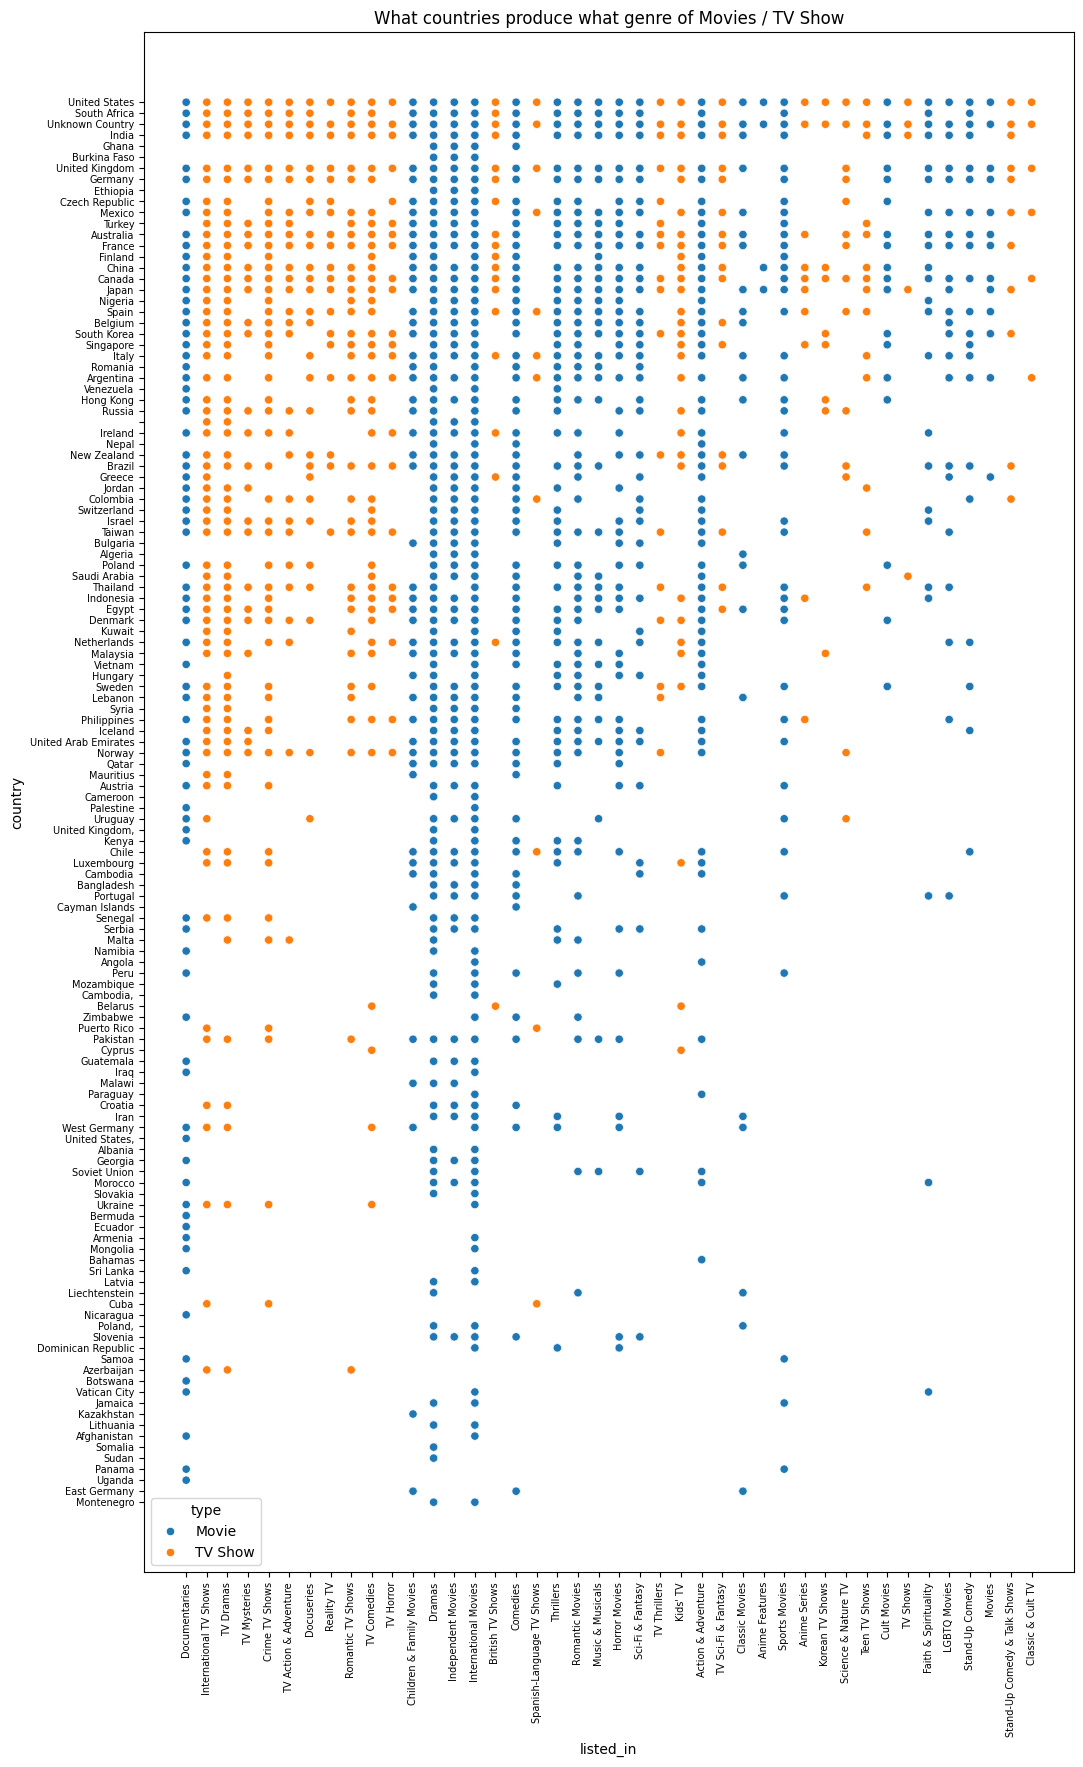

In [54]:
plt.figure(figsize = (12,20))
plt.xticks(rotation = 90, fontsize = 7)
plt.yticks(fontsize = 7)
plt.title("What countries produce what genre of Movies / TV Show")
sns.scatterplot(data = df_final, y = "country", x = "listed_in", hue = "type")
plt.show()

**Comparison of tv shows vs. movies**

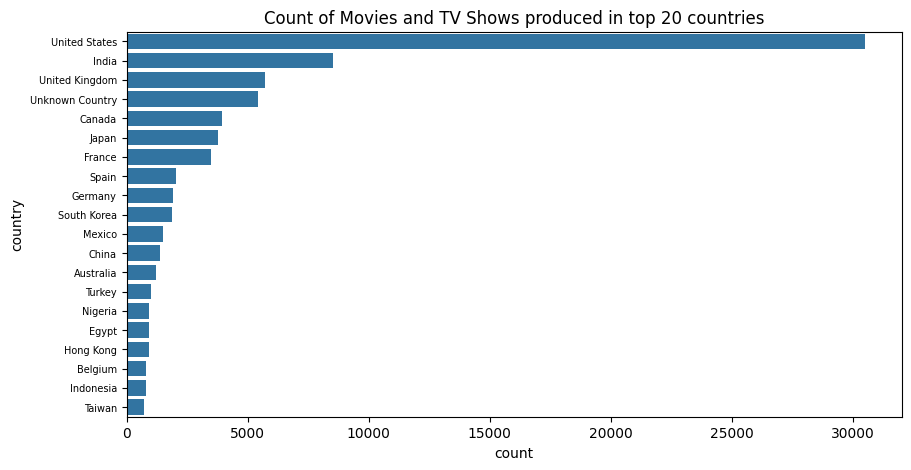

In [55]:
plt.figure(figsize = (10,5))
plt.yticks(fontsize = 7)
plt.title("Count of Movies and TV Shows produced in top 20 countries")
sns.countplot(data = data_unnest, y = "country", order = data_unnest["country"].value_counts().index[:20])
plt.show()

In [56]:
df_1 = data_unnest[data_unnest["type"] == "Movie"].groupby("country").count().sort_values("title", ascending = False)
df_1 = pd.DataFrame(df_1[0:20]["title"]).reset_index().rename(columns = ({'title' : 'count'}))
df_1[:10]

,country,count
0,United States,23675
1,India,7835
2,United Kingdom,4053
3,Unknown Country,2993
4,Canada,2862
5,France,2742
6,Germany,1526
7,Japan,1408
8,Spain,1405
9,China,1035


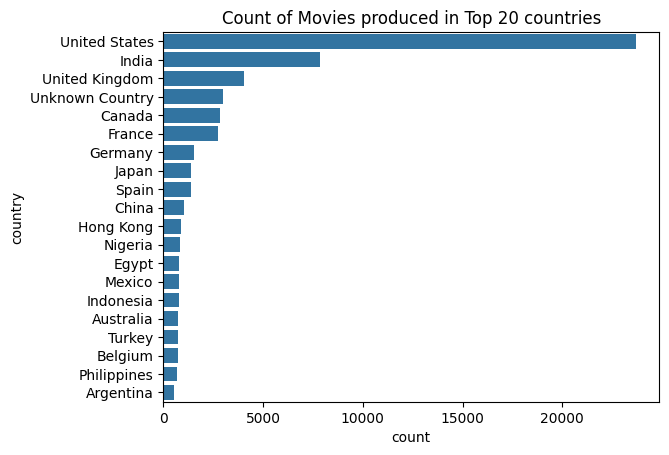

In [57]:
plt.title("Count of Movies produced in Top 20 countries")
sns.barplot(data = df_1, x = "count", y = "country")
plt.show()

In [58]:
df_2 = data_unnest[data_unnest["type"] == "TV Show"].groupby("country").count().sort_values("title", ascending = False)
df_2 = pd.DataFrame(df_2[0:20]["title"]).reset_index().rename(columns = ({'title' : 'count'}))
df_2[:10]

,country,count
0,United States,6796
1,Unknown Country,2428
2,Japan,2350
3,United Kingdom,1660
4,South Korea,1336
5,Canada,1084
6,France,747
7,Mexico,713
8,India,702
9,Spain,628


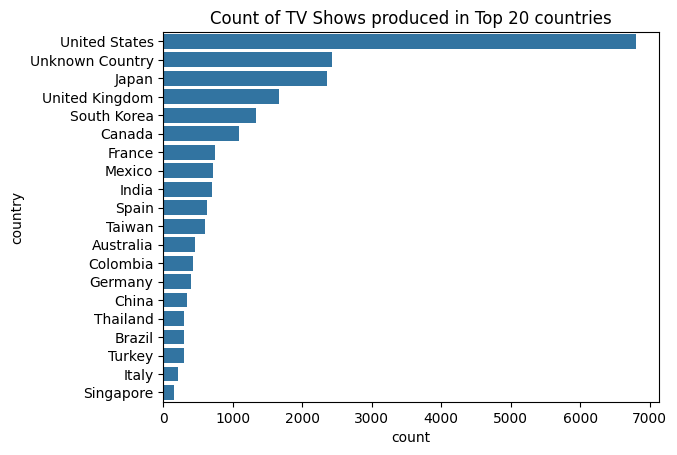

In [59]:
plt.title("Count of TV Shows produced in Top 20 countries")
sns.barplot(data = df_2, x = "count", y = "country")
plt.show()

***Insights***
*   Some countried don't have TV shows at all
*   Only Cuba has only TV shows and no movies
*   Almost half of the countries listed have quite a lot of type of TV shows and movies (shown on the top of the plot) and the other half have only a few types of TV Shows / movies produced.
*   Countires like US, UK, Germany, India have almost all types of movies and TV Shows produced.
*   Some countires like United States and India appear to have more number of TV shows than movies produced.

* **US, India, UK, Japan, France, Canada are the countries with most content.**

**How has the number of movies released per year changed over the last 20-30 years?**

In [60]:
df[(df["type"] == "Movie") & (df["release_year"]>=1990)]["release_year"].value_counts()[:10]

release_year
2017    767
2018    767
2016    658
2019    633
2020    517
2015    398
2021    277
2014    264
2013    225
2012    173
Name: count, dtype: int64

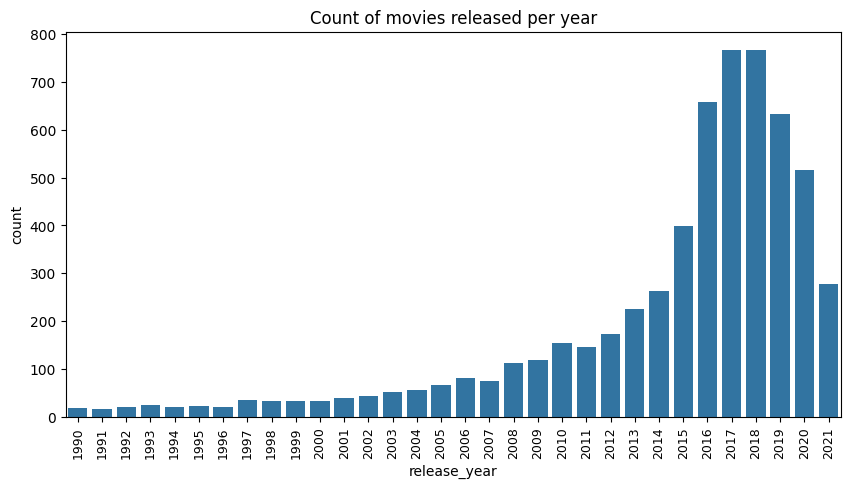

In [61]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 90, fontsize = 9)
plt.title("Count of movies released per year")
sns.countplot(data = df[(df["type"] == "Movie") & (df["release_year"]>=1990)], x = "release_year")
plt.show()

***Insights***
*   Over the last 2 decades, number of movies release has increased by about 20-25 times
*   Over the last 3 decades, number of movies released has increased by about 70 times
*   Highest peak of movies was in 2017-2018, about 770 movies per year
*   From 2019 to 2021, number of movies released per year has reduced gradually from about 620 in 2019 to 520 in 2020 to 280 in 2021

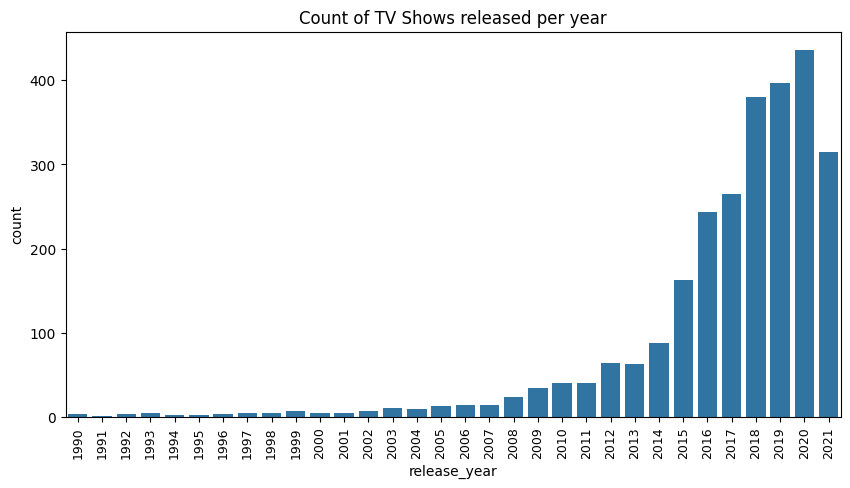

In [62]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 90, fontsize = 9)
plt.title("Count of TV Shows released per year")
sns.countplot(data = df[(df["type"] == "TV Show") & (df["release_year"]>=1990)], x = "release_year")
plt.show()

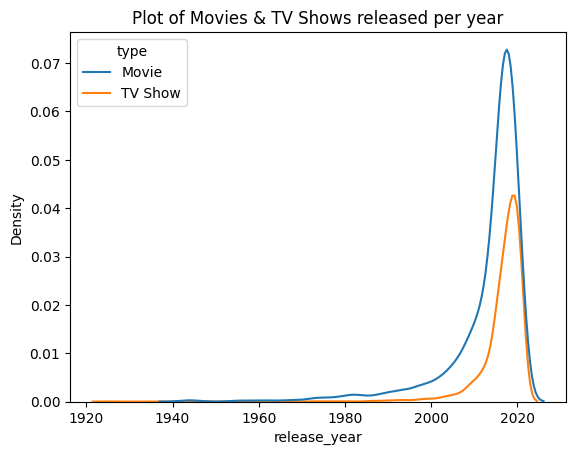

In [63]:
plt.title("Plot of Movies & TV Shows released per year")
sns.kdeplot(data = df, x = "release_year", hue = "type")
plt.show()

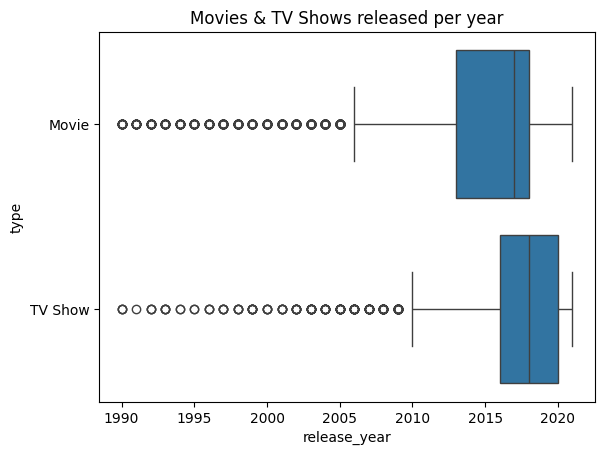

In [64]:
plt.title("Movies & TV Shows released per year")
sns.boxplot(data = df[df["release_year"]>=1990], x = "release_year", y = "type")
plt.show()

***Insights***
*   Over the last 2 decades, number of TV shows release has increased by about 225 times (from 2 to 450)
*   Over the last 3 decades, number of TV shows released has increased by about 450 times (from 1 to 450)
*   Highest peak of TV Shows was in 2020, about 450 TV Shows per year
*   In 2021, abotu 320 TV shows were released but this could be because of partial data for the year 2021
* **Number of releases from 2019, decreasing per year for Movies and increasing per year for TV Shows shows a change in demographics preferances of TV Shows over Movies.**

**Comparison of tv shows vs. movies.**

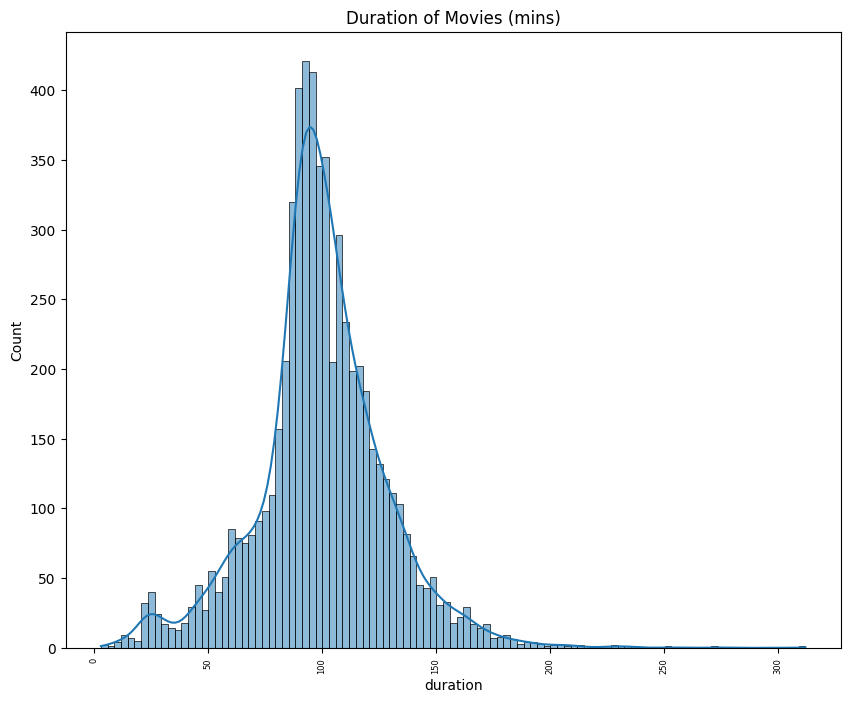

In [65]:
plt.figure(figsize = (10,8))
plt.xticks(rotation = 90, fontsize = 6)
plt.title("Duration of Movies (mins)")
sns.histplot(data = df[df["type"] == "Movie"], x = "duration", kde = True)
plt.show()

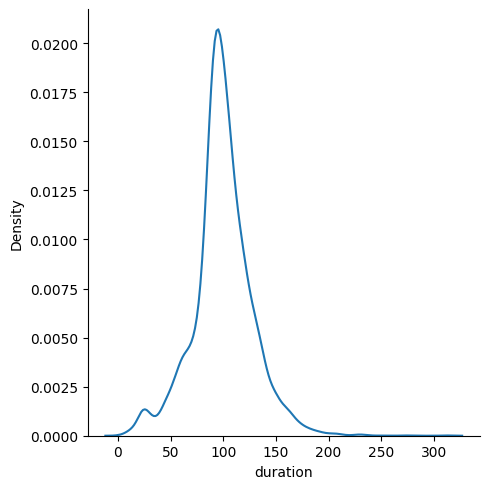

In [66]:
#plt.title("Duration of Movies (Mins)")
sns.displot(data = df[df["type"] == "Movie"], x = "duration", kind = "kde")
plt.show()

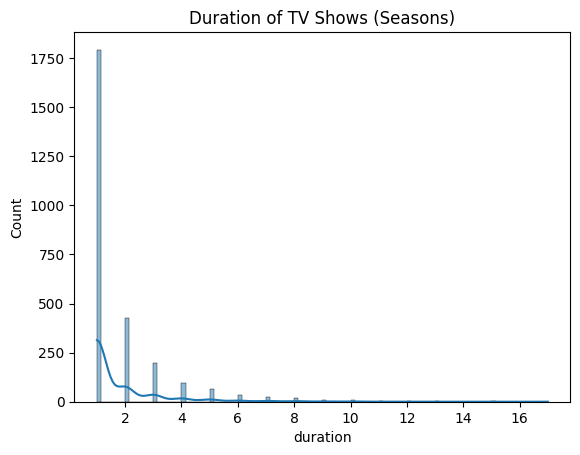

In [67]:
plt.title("Duration of TV Shows (Seasons)")
sns.histplot(data = df[df["type"] == "TV Show"], x = "duration", kde = True)
plt.show()

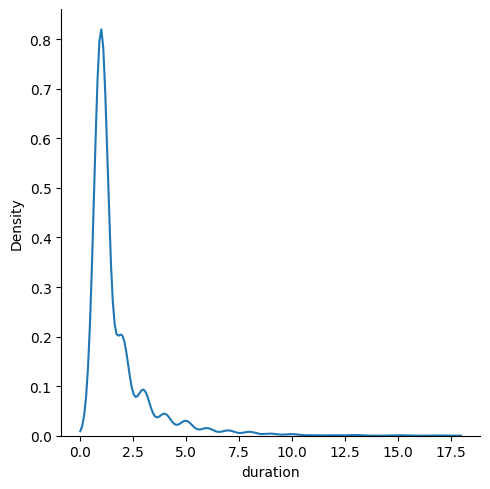

In [68]:
sns.displot(data = df[df["type"] == "TV Show"], x = "duration", kind = "kde")
plt.show()

***Insights***
* **The duration plot of movies shows a near normal distribution with most of the movies having duration between 90-99 minutes.**
* **The duration for TV Shows is inclined to the left with most TV Shows having 1 Season.**

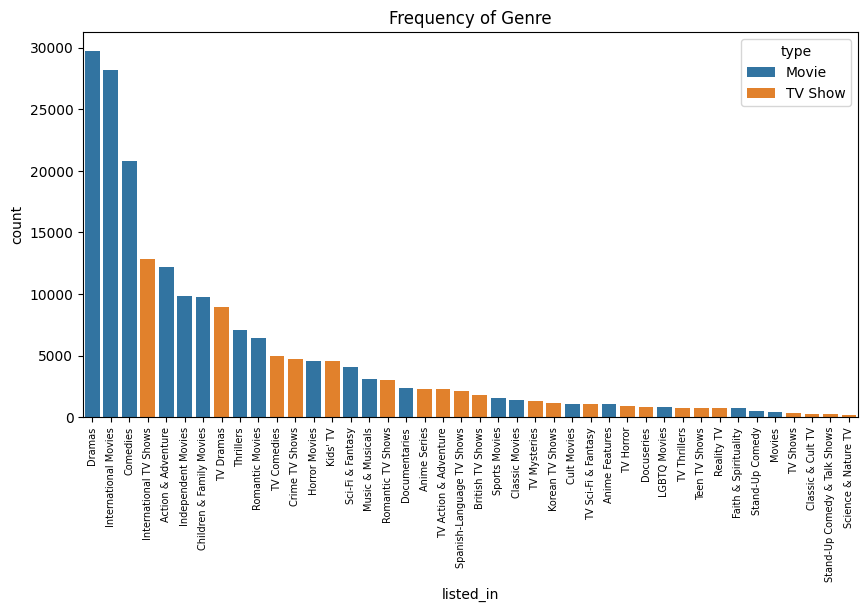

In [69]:
plt.figure(figsize = (10,5))
plt.xticks(rotation = 90, fontsize = 7)
plt.title("Frequency of Genre")
sns.countplot(data = df_final, x = "listed_in", hue = "type", order = df_final["listed_in"].value_counts().index)
plt.show()

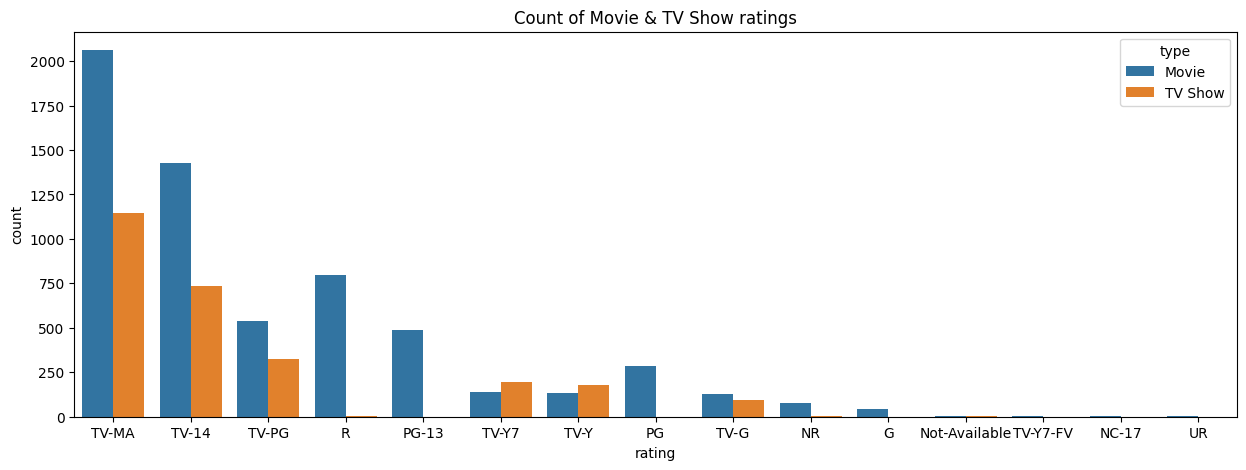

In [70]:
plt.figure(figsize = (15,5))
plt.title("Count of Movie & TV Show ratings")
sns.countplot(data = df, x = "rating", hue = "type", order = df["rating"].value_counts().index)
plt.show()

***Insights***
* Frequency of Movie types Dramas, International Movies, Comedies are listed more than any other types
* Frequency of Movie types Action & Adventure, Independent Movies, Children & Family Movies are next in line.
* Frequency of TV Show types International TV Shows, TV Dramas are most among others with TV Comedies, Crime TV Show and Kids TV next in line.

* Movies and TV Shows with rating TV-MA & TV-14 are listed the most in MediaStreamCompany hence assuming they are preferred the most.
* Number of R and PG-13 rated movies are listed more over a TV show of same rating.

**What is the best time to launch a TV show?**

In [71]:
df_time = df.copy()
df_time["launch_month"] = df_time["date_added"].dt.month
df_time["launch_week"] = df_time["date_added"].dt.isocalendar().week
df_time[df_time["type"] == "Movie"].groupby("launch_month").count().sort_values("title", ascending = False)["title"]

launch_month
7     565
4     550
12    547
1     546
10    545
3     529
8     519
9     519
11    498
6     492
5     439
2     382
Name: title, dtype: int64

In [72]:
df_time[df_time["type"] == "TV Show"].groupby("launch_month").count().sort_values("title", ascending = False)["title"]

launch_month
12    266
7     262
9     251
6     236
8     236
10    215
4     214
3     213
11    207
1     202
5     193
2     181
Name: title, dtype: int64

In [73]:
df_time[df_time["type"] == "Movie"].groupby("launch_week").count().sort_values("title", ascending = False)["title"][:10]

launch_week
1     316
44    243
40    215
9     207
26    195
35    189
31    185
13    174
18    173
27    154
Name: title, dtype: int64

In [74]:
df_time[df_time["type"] == "TV Show"].groupby("launch_week").count().sort_values("title", ascending = False)["title"][:10]

launch_week
27    86
31    83
13    76
44    75
24    75
35    74
5     73
26    73
40    72
50    70
Name: title, dtype: int64

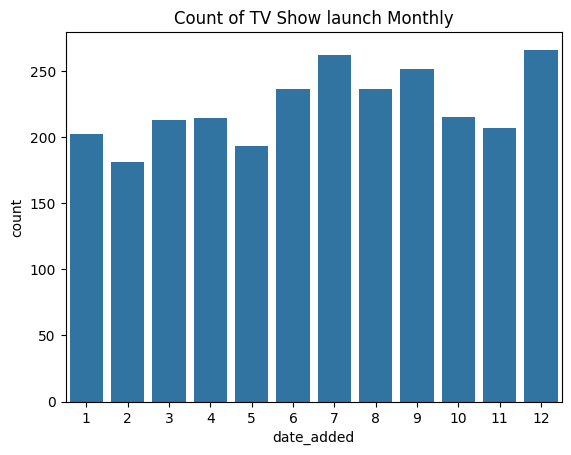

In [75]:
df_tv = df[df["type"] == "TV Show"]
plt.title("Count of TV Show launch Monthly")
sns.countplot(data = df_tv, x = df_tv["date_added"].dt.month)
plt.show()

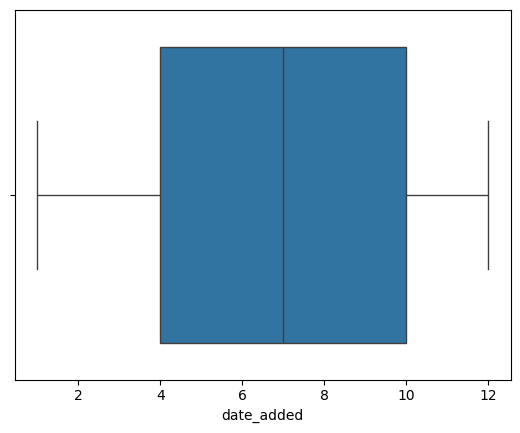

In [76]:
sns.boxplot(data = df_tv, x = df_tv["date_added"].dt.month)
plt.show()

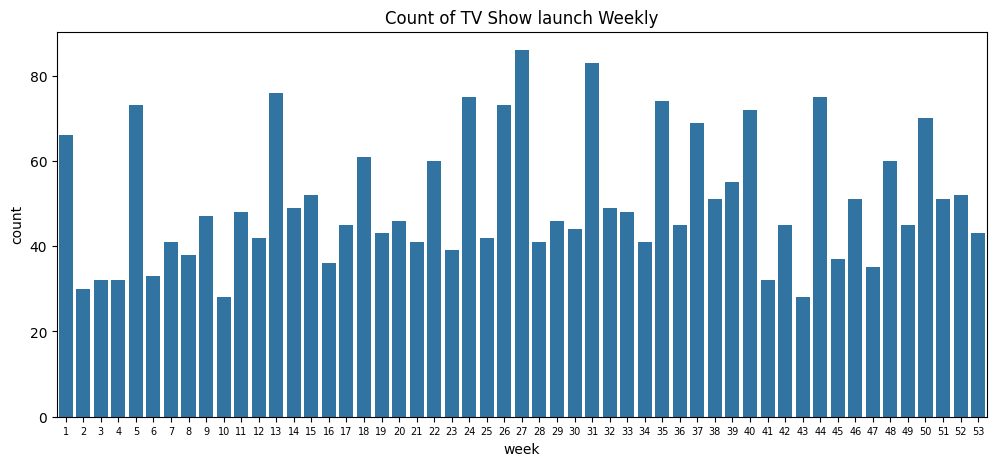

In [79]:
plt.figure(figsize = (12,5))
plt.xticks(fontsize = 7)
plt.title("Count of TV Show launch Weekly")
sns.countplot(data = df_tv, x = df_tv["date_added"].dt.isocalendar().week) # Use .dt.isocalendar().week to get week number
plt.show()

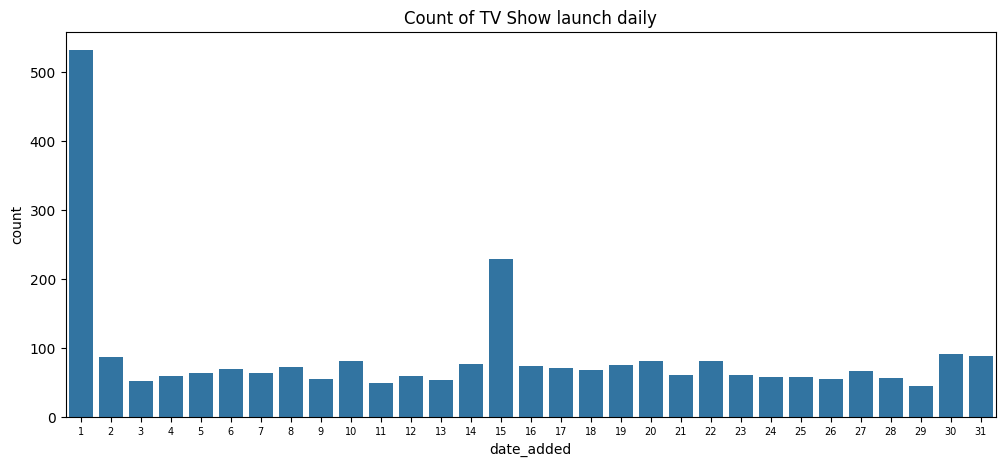

In [80]:
plt.figure(figsize = (12,5))
plt.xticks(fontsize = 7)
plt.title("Count of TV Show launch daily")
sns.countplot(data = df_tv, x = df_tv["date_added"].dt.day)
plt.show()

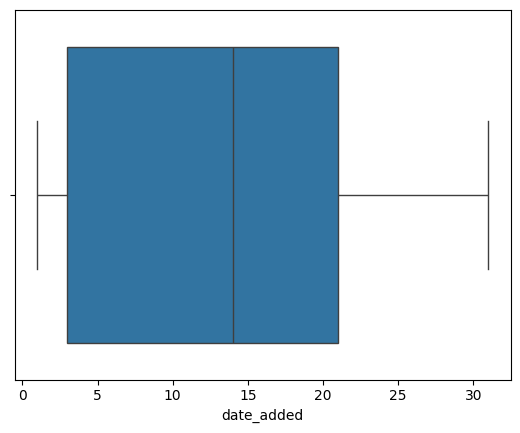

In [81]:
sns.boxplot(data = df_tv, x = df_tv["date_added"].dt.day)
plt.show()

***Insights***

* **Month of the year** : TV Shows are launched on MediaStreamCompany every month of the year, so there is no preference but July, September, December have most number of TV Show launches compared to other months.
* **Week of the year** : 1,5,13,18,22,24,26,27,31,35,37,40,44,46,48,50 are the weeks when TV shows have been launched the most apparently above average of y axis.
* **Day of the month** : There is a very clear indication of most TV shows being launched on 1st and 15th of every month.
* Similar trend as TV shows, also observed for Movies.

* **Based on available data, launching a TV Show on MediaStreamCompany on 1st / 15th of December, July, September would be the best time in descending order of preference.**
* **Based on available data, launching a Movie on MediaStreamCompany on 1st / 15th of July, April, December, January, November would be the best time in descending order of preference..**
* **While information about date_added to MediaStreamCompany is given, additional information about which shows generated most revenue because of carefully selected launch date would be more helpful to identify a pattern which could then used for other shows to generate more profit.**

In [82]:
df_launch = df.copy()
df_launch["launch_year"] = df_launch["date_added"].dt.year
df_launch["delay_in_launch"] = df_launch["launch_year"] - df["release_year"]
df_launch.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,launch_year,delay_in_launch
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Actor,United States,2021-09-25,2020,PG-13,90,Documentaries,"As her father nears the end of his life, filmm...",2021,1
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,0
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Actor,Unknown Country,2021-09-24,2021,TV-MA,1,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,0
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,0


In [83]:
df_launch["delay_in_launch"].value_counts()

delay_in_launch
 0     3241
 1     1585
 2      715
 3      491
 4      368
       ... 
-2        1
 93       1
 60       1
 70       1
 63       1
Name: count, Length: 75, dtype: int64

<Axes: title={'center': 'Best Time(year) to Launch Move / TV Show on MediaStreamCompany After Release'}, xlabel='count', ylabel='delay_in_launch'>

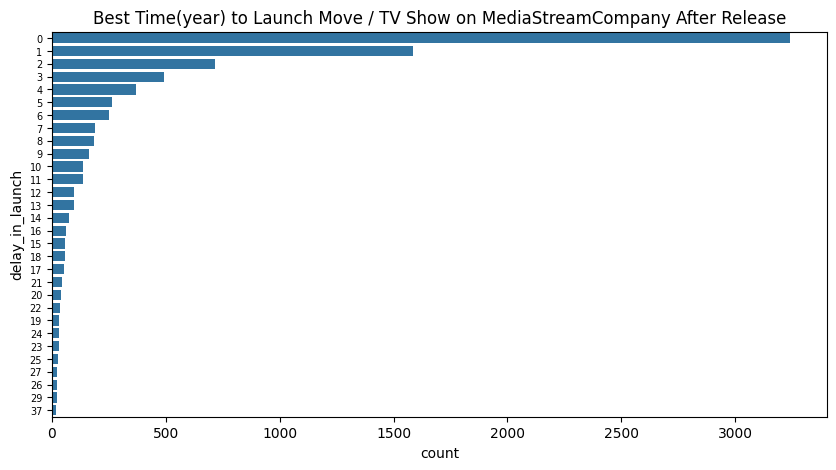

In [84]:
plt.figure(figsize = (10,5))
plt.yticks(fontsize = 7)
plt.title("Best Time(year) to Launch Move / TV Show on MediaStreamCompany After Release")
sns.countplot(data = df_launch, y = "delay_in_launch", order = df_launch["delay_in_launch"].value_counts().index[:30])

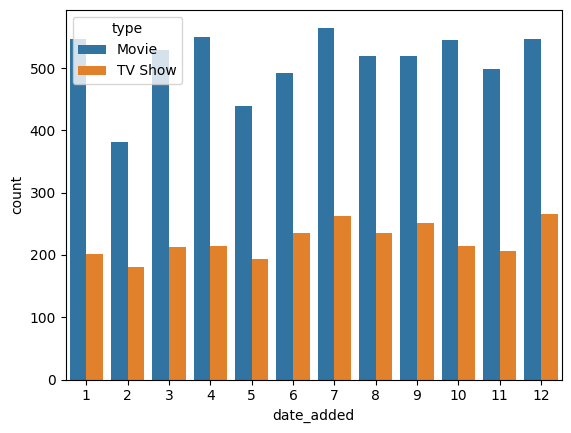

In [85]:
sns.countplot(data = df, x = df["date_added"].dt.month, hue = "type")
plt.show()

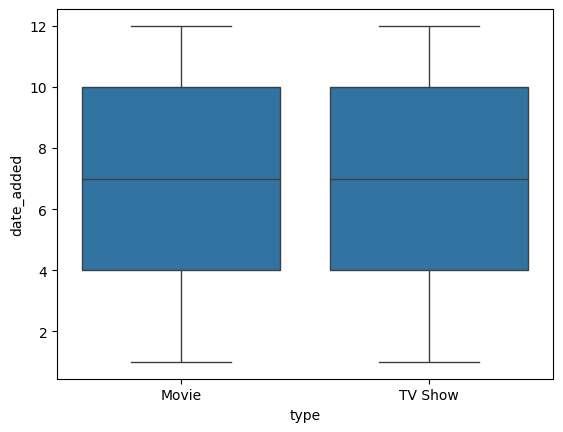

In [86]:
sns.boxplot(data = df, y = df["date_added"].dt.month, x = "type")
plt.show()

<ipython-input-92-691bbbaba09c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tv["week"] = df_tv["date_added"].dt.isocalendar().week.fillna(-1)  # Fill with -1 or drop using .dropna()


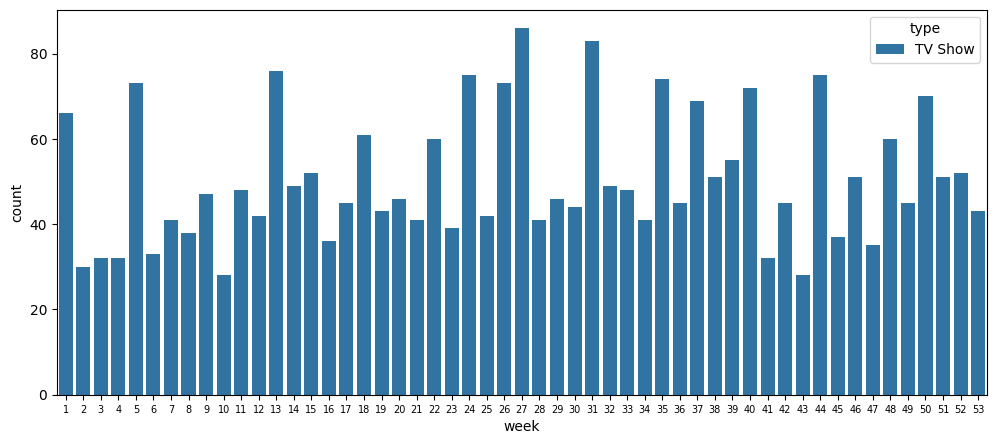

In [92]:
# Fill missing week values with a placeholder or drop them
df_tv["week"] = df_tv["date_added"].dt.isocalendar().week.fillna(-1)  # Fill with -1 or drop using .dropna()

plt.figure(figsize=(12, 5))
plt.xticks(fontsize=7)
sns.countplot(data=df_tv, x="week", hue="type")
plt.show()

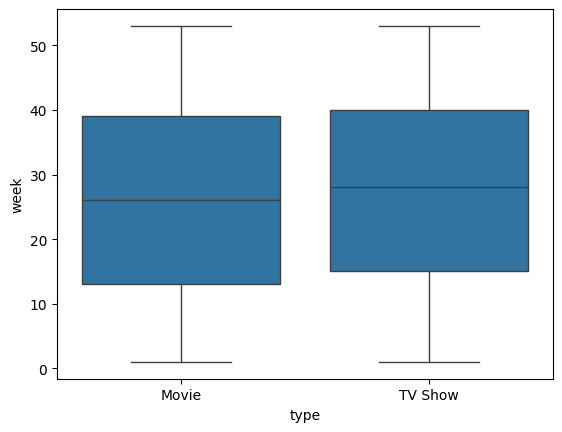

In [98]:
sns.boxplot(data = df, y = df["date_added"].dt.isocalendar().week,x = "type")
plt.show()

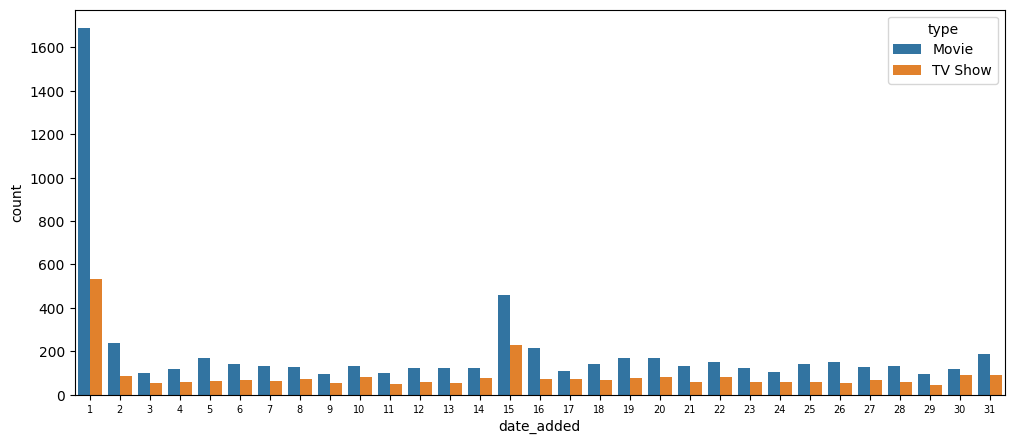

In [94]:
plt.figure(figsize = (12,5))
plt.xticks(fontsize = 7)
sns.countplot(data = df, x = df["date_added"].dt.day, hue = "type")
plt.show()

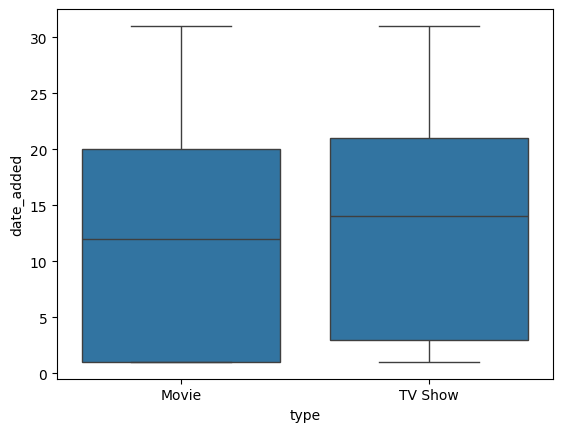

In [95]:
sns.boxplot(data = df, y = df["date_added"].dt.day, x = "type")
plt.show()

**Analysis of actors/directors of different types of shows/movies.**

In [99]:
data_unnest.groupby("director").count().sort_values("title", ascending = False)["title"][:10]

director
Unknown Director       21937
Martin Scorsese          217
Steven Spielberg         205
Martin Campbell          154
Raja Gosnell             154
Youssef Chahine          150
McG                      150
Rajiv Chilaka            139
Don Michael Paul         132
Cathy Garcia-Molina      125
Name: title, dtype: int64

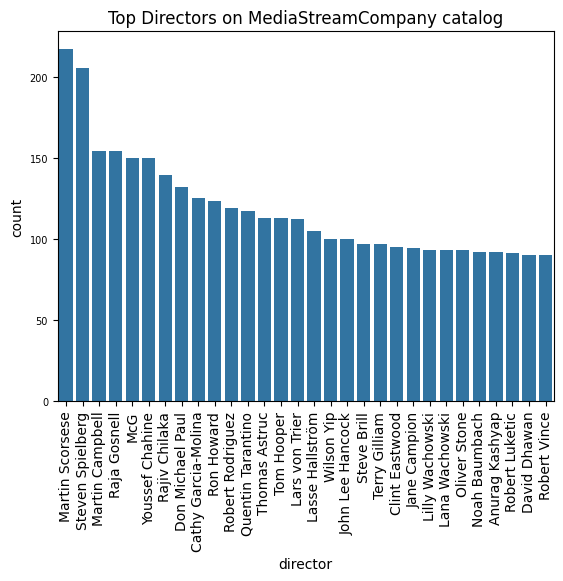

In [118]:
director_counts = data_unnest["director"].value_counts().reset_index()[1:31]
plt.yticks(fontsize = 7)
plt.xticks(rotation = 90)
plt.title("Top Directors on MediaStreamCompany catalog")
sns.barplot(data = director_counts, x = "director", y = "count")
plt.show()

In [102]:
data_unnest[data_unnest["type"]== "Movie"].groupby("director").count().sort_values("title", ascending = False)["title"][:10]

director
Unknown Director       785
Martin Scorsese        217
Steven Spielberg       205
Martin Campbell        154
Raja Gosnell           154
Youssef Chahine        150
McG                    150
Rajiv Chilaka          139
Don Michael Paul       132
Cathy Garcia-Molina    125
Name: title, dtype: int64

In [103]:
data_unnest[data_unnest["type"]== "TV Show"].groupby("director").count().sort_values("title", ascending = False)["title"][:10]

director
Unknown Director         21152
Thomas Astruc               80
Noam Murro                  63
Houda Benyamina             52
Laïla Marrakchi             52
Alan Poul                   52
Damien Chazelle             52
Rob Seidenglanz             40
Iginio Straffi              40
Gautham Vasudev Menon       33
Name: title, dtype: int64

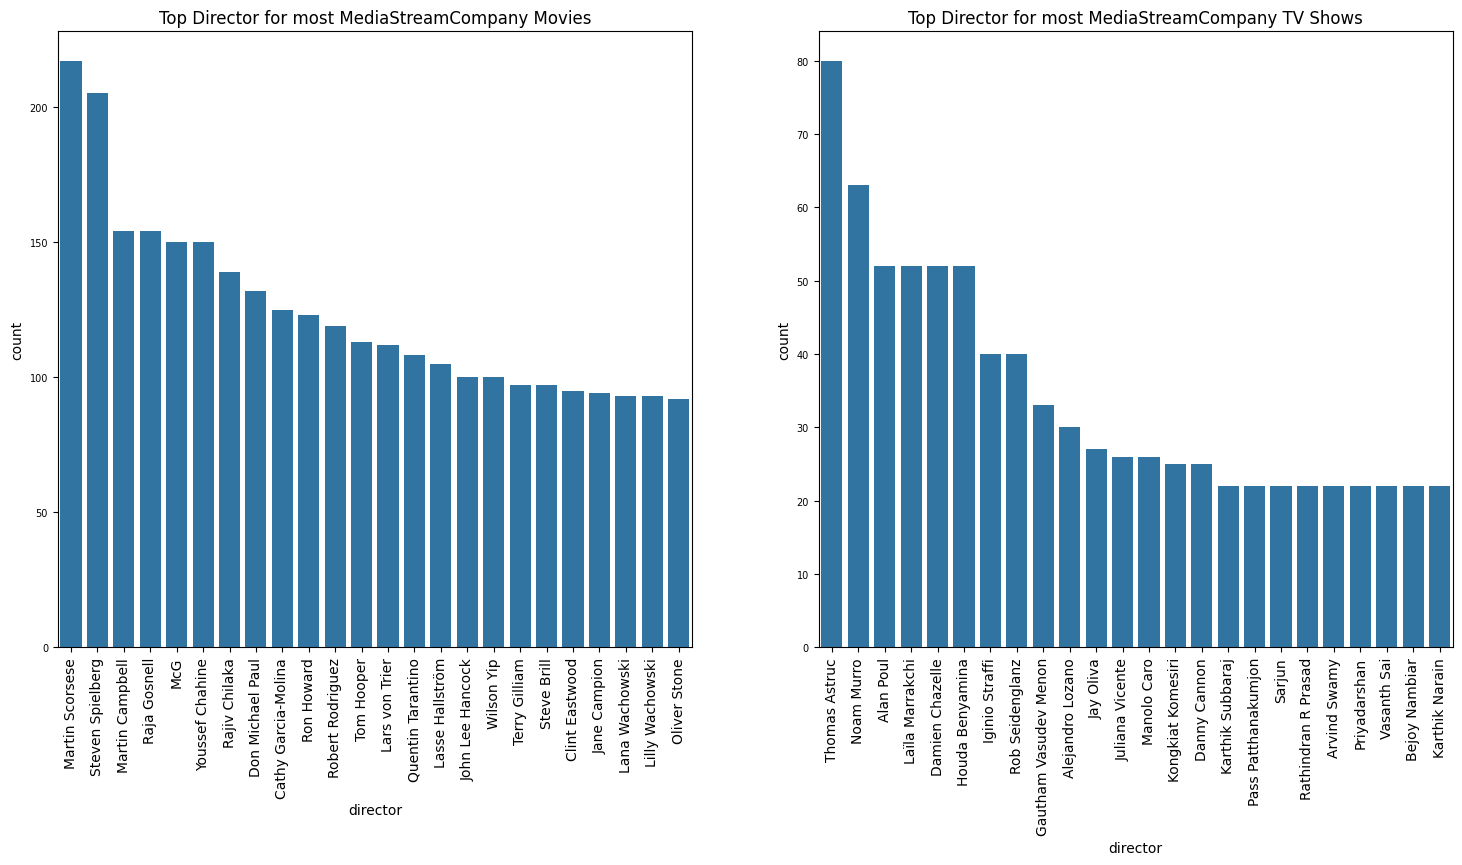

In [117]:
director_counts_movie = data_unnest[data_unnest["type"] == "Movie"]["director"].value_counts().reset_index()[1:25] #Removing Unknown Director Outlier hence starting from 1
director_counts_tvshow = data_unnest[data_unnest["type"] == "TV Show"]["director"].value_counts().reset_index()[1:25] #Removing Unknown Director Outlier hence starting from 1

plt.figure(figsize = (18,8))

plt.subplot(1,2,1)
plt.yticks(fontsize = 7)
plt.xticks(rotation = 90)
plt.title("Top Director for most MediaStreamCompany Movies")
sns.barplot(data = director_counts_movie, x = "director", y = "count")

plt.subplot(1,2,2)
plt.yticks(fontsize = 7)
plt.xticks(rotation = 90)
plt.title("Top Director for most MediaStreamCompany TV Shows")
sns.barplot(data = director_counts_tvshow, x = "director", y = "count")

plt.show()

In [106]:
data_unnest.groupby("cast").count().sort_values("title", ascending = False)["title"][:10]

cast
Unknown Actor        1190
Alfred Molina          85
Liam Neeson            82
John Krasinski         67
Salma Hayek            66
Frank Langella         66
John Rhys-Davies       60
Tara Strong            54
James Franco           53
Quvenzhané Wallis      50
Name: title, dtype: int64

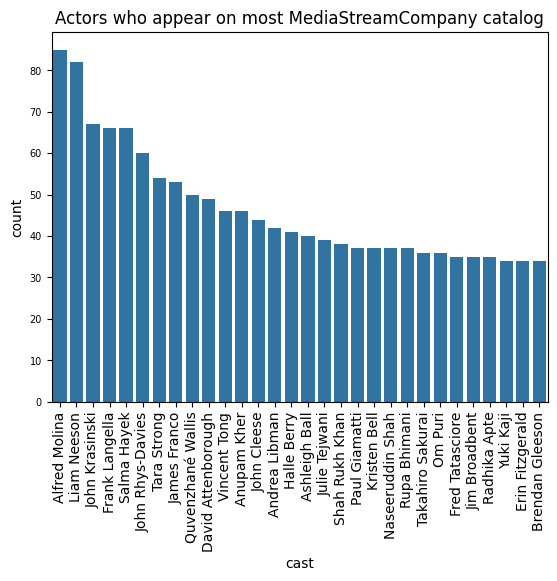

In [116]:
cast_counts = data_unnest["cast"].value_counts().reset_index()[1:31]
plt.yticks(fontsize = 7)
plt.xticks(rotation = 90)
plt.title("Actors who appear on most MediaStreamCompany catalog")
sns.barplot(data = cast_counts, x = "cast", y = "count")
plt.show()

In [109]:
data_unnest[data_unnest["type"]== "Movie"].groupby("cast").count().sort_values("title", ascending = False)["title"][:10]

cast
Unknown Actor        767
Alfred Molina         84
Liam Neeson           82
John Krasinski        66
Frank Langella        66
Salma Hayek           66
John Rhys-Davies      57
James Franco          53
Quvenzhané Wallis     50
Anupam Kher           43
Name: title, dtype: int64

In [110]:
data_unnest[data_unnest["type"]== "TV Show"].groupby("cast").count().sort_values("title", ascending = False)["title"][:10]

cast
Unknown Actor         423
David Attenborough     28
Vincent Tong           26
Takahiro Sakurai       26
Brian Drummond         20
Yuki Kaji              20
Ashleigh Ball          20
Johnny Yong Bosch      19
Junichi Suwabe         18
Daisuke Ono            18
Name: title, dtype: int64

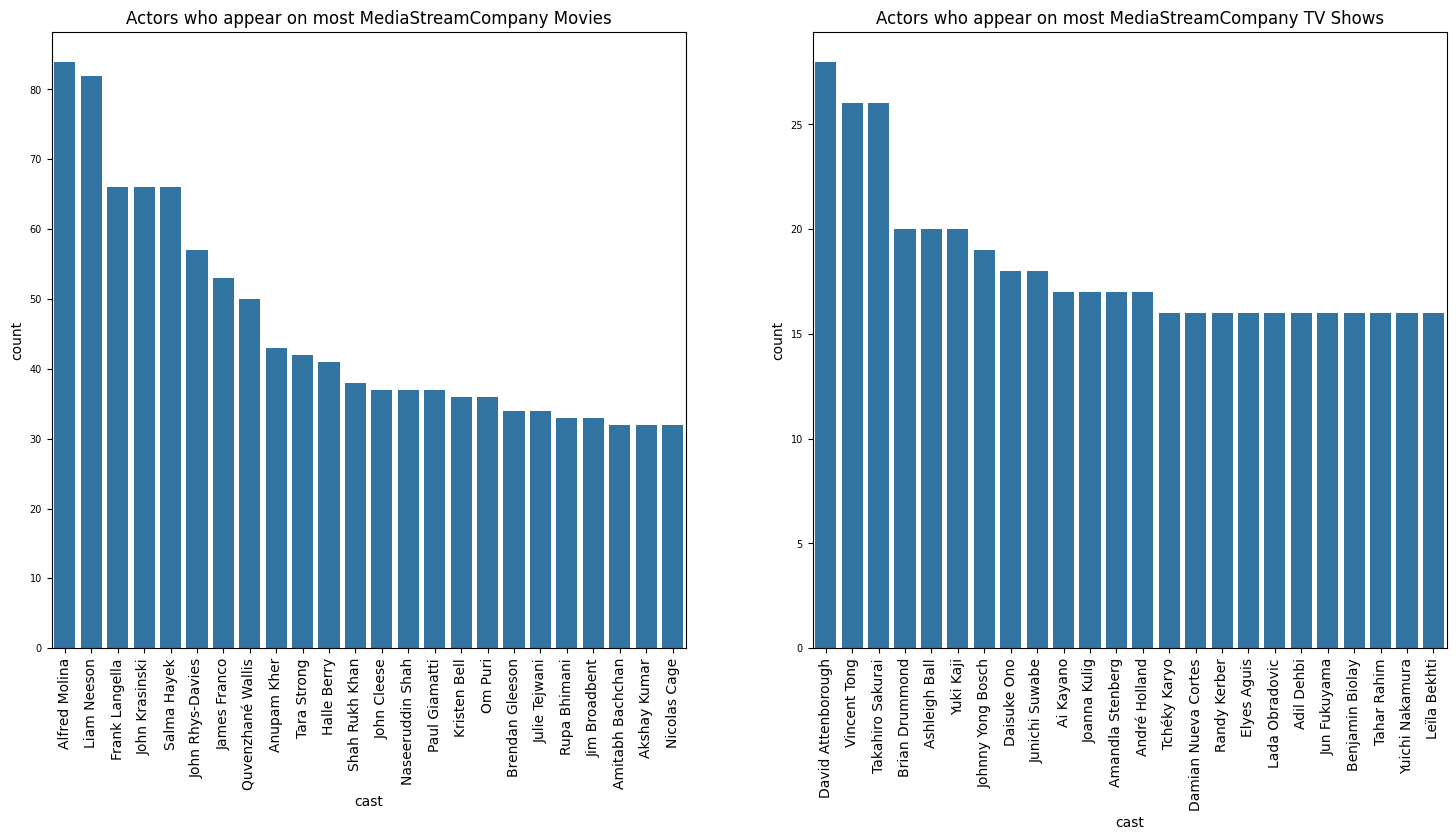

In [115]:
cast_counts_movie = data_unnest[data_unnest["type"] == "Movie"]["cast"].value_counts().reset_index()[1:25] #Removing Unknown Cast Outlier hence starting from 1
cast_counts_tvshow = data_unnest[data_unnest["type"] == "TV Show"]["cast"].value_counts().reset_index()[1:25] #Removing Unknown Cast Outlier hence starting from 1

plt.figure(figsize = (18,8))

plt.subplot(1,2,1)
plt.yticks(fontsize = 7)
plt.xticks(rotation = 90)
plt.title("Actors who appear on most MediaStreamCompany Movies")
sns.barplot(data = cast_counts_movie, x = "cast", y = "count")

plt.subplot(1,2,2)
plt.yticks(fontsize = 7)
plt.xticks(rotation = 90)
plt.title("Actors who appear on most MediaStreamCompany TV Shows")
sns.barplot(data = cast_counts_tvshow, x = "cast", y = "count")

plt.show()

***Insights***
* Martin Scorsese, Steven Spielberg, Martin Campbell are the top 3 directors with most MediaStreamCompany Movies directed.
* Thomas Astruc, Noam Murro, Alan Loul are the top 3 directors with most MediaStreamCompany TV shows directed.
* Alfred Molina, Liam Neeson, Frank Langella are the actors that appear most on MediaStreamCompany Movies
* David Attenborough, Vincent Tong, Takahiro Sakurai are the actors that appear the most on MediaStreamCompany TV Shows

**Does MediaStreamCompany has more focus on TV Shows than movies in recent years ?**

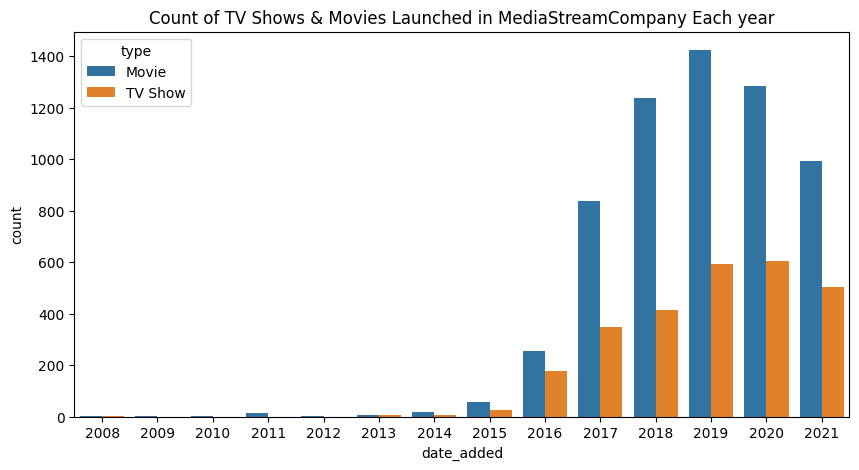

In [119]:
plt.figure(figsize = (10,5))
plt.title("Count of TV Shows & Movies Launched in MediaStreamCompany Each year")
sns.countplot(data = df, x = df["date_added"].dt.year, hue = "type")
plt.show()

***Insights***
* The trend for number of Movies / TV Shows launched by MediaStreamCompany each year shows a similar trend, hence cannot comment on whether MediaStreamCompany has more focus on TV shows than movies in recent years.
* Number of Movies / TV Shows launched appears to be decreasing in 2020, 2021 respectively but this could be due to the impact of Covid-19 outbreak and high pricing system of MediaStreamCompany, even though OTT platforms were in high demand during lockdown.

<Axes: title={'center': 'Most Produced Genre'}, ylabel='listed_in'>

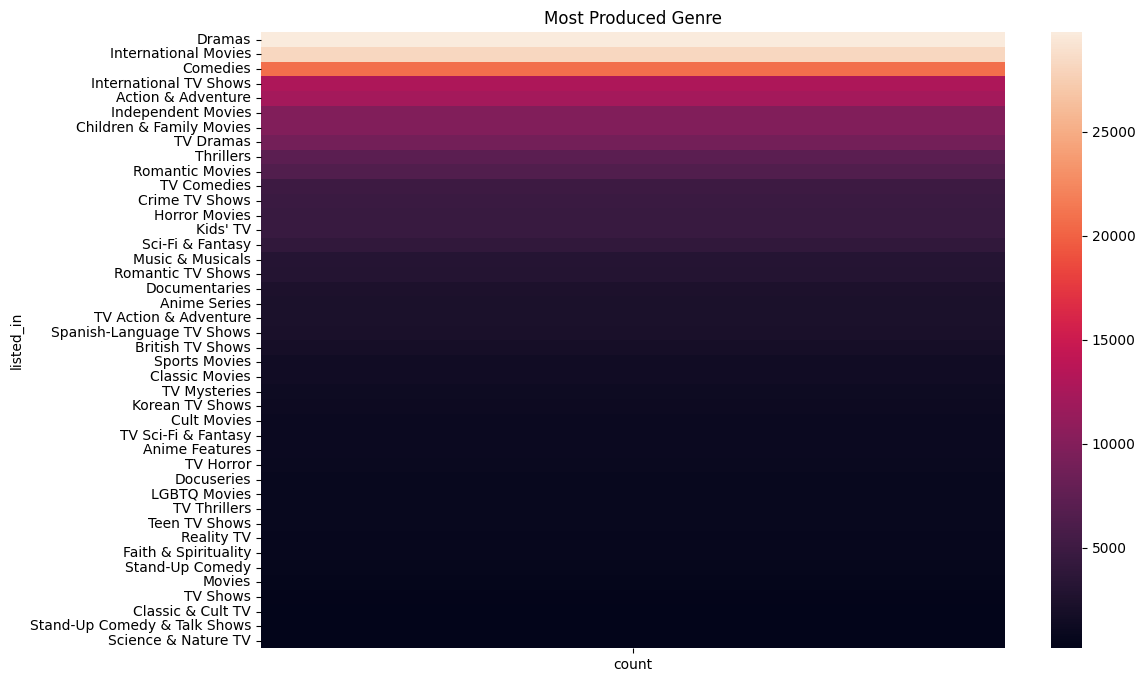

In [120]:
#Highest watched Movie / TV Show type (genres) on MediaStreamCompany

plt.figure(figsize = (12,8))
plt.title("Most Produced Genre")
df_genre = pd.DataFrame(df_final["listed_in"].value_counts())
sns.heatmap(df_genre)

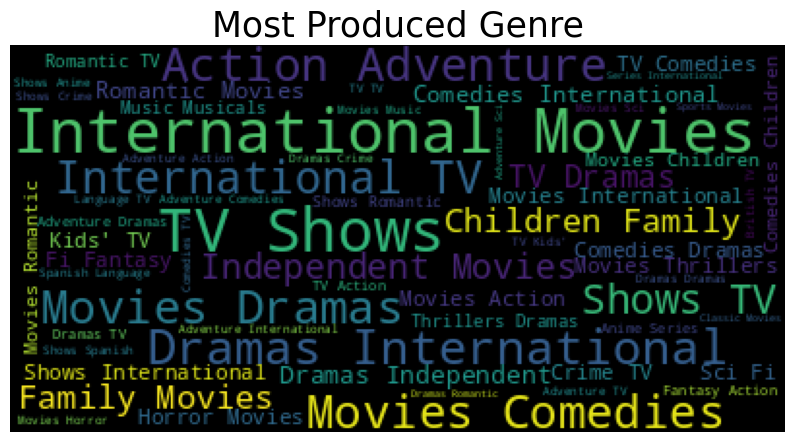

In [121]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
plt.figure(figsize=(10,10))
wordcloud = WordCloud(stopwords=STOPWORDS, max_words=100).generate(' '.join(df_final['listed_in'])) #Details about format and parameters, stopwords won't be included
plt.imshow(wordcloud)  #' '.join because title contains spaces. #generate is for the word cloud to be genearated on which text
plt.axis('off')
plt.title('Most Produced Genre',fontsize = 25)
plt.show()

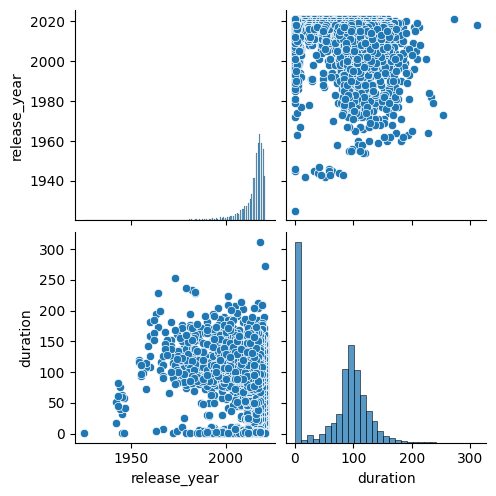

In [122]:
sns.pairplot(data = df)
plt.show()

In [125]:
#PLEASE IGNORE THIS FOR EVALUATION
'''
import plotly.express as px
df_genre = pd.DataFrame(df["listed_in"].value_counts()).reset_index().rename(columns={'index':'genre', 'listed_in':'count'})
# Changed the path argument to a list of strings representing the hierarchy
fig_tree = px.treemap(df_genre, path=['genre'], values='count')
fig_tree.update_layout(title='Highest watched Geners on MediaStreamCompany',
                  margin=dict(t=50, b=0, l=70, r=40),
                  plot_bgcolor='#333', paper_bgcolor='#333',
                  title_font=dict(size=25, color='#fff', family="Lato, sans-serif"),
                  font=dict(color='#8a8d93'),
                  hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))
fig_tree.show()
'''

'\nimport plotly.express as px\ndf_genre = pd.DataFrame(df["listed_in"].value_counts()).reset_index().rename(columns={\'index\':\'genre\', \'listed_in\':\'count\'})\n# Changed the path argument to a list of strings representing the hierarchy\nfig_tree = px.treemap(df_genre, path=[\'genre\'], values=\'count\')  \nfig_tree.update_layout(title=\'Highest watched Geners on MediaStreamCompany\',\n                  margin=dict(t=50, b=0, l=70, r=40),\n                  plot_bgcolor=\'#333\', paper_bgcolor=\'#333\',\n                  title_font=dict(size=25, color=\'#fff\', family="Lato, sans-serif"),\n                  font=dict(color=\'#8a8d93\'),\n                  hoverlabel=dict(bgcolor="#444", font_size=13, font_family="Lato, sans-serif"))\nfig_tree.show()\n'

## ***Overall Collated Insights***

6. **Insights based on Non-Graphical and Visual Analysis**
   
   **6.1 Comments on the range of attributes**
   
   **6.2 Comments on the distribution of the variables and relationship between them**
   
   **6.3 Comments for each univariate and bivariate plot**

7. **Business Insights - Should include patterns observed in the data along with what you can infer from it**

**OBSERVATIONS - Initial DataSet Analysis**

1) 8807 samples & 12 features are present in the dataset

2) Only 2 types - Movies / TV Shows
* Movies in the dataset have been released from 1942 to 2021
* TV Shows in the dataset have been released from 1925 to 2021
* There are 6131 movies and 2676 TV Show listed
* 75%ile of Movies / TV Shows in MediaStreamCompany are released after 2013

**MISSING VALUES**

3) director, cast, country have MANY missing values [Replace with Unknown]

4) date_added, rating, duration have FEW missing values [Date > Most frequently released date, Rating > Unknown]

**UPDATE COLUMN FORMATS**

5) Movies duration is in minutes & TV shows duration is in Seasons [Convert this column to int]

6) Date_added to MediaStreamCompany is in object format [Convert this to DateTime for better analysis]

**UN-NESTING**

7) Director, Cast (Actor), Country, and Listed_in columns have nested comma separated values [These columns need to be un-nested]

8) Last 3 ratings in value_counts() (74min, 84 min, 66 min) appears to be incorrectly mentioned in rating columns hence need to be updated in duartion column because ratings column cannot have the rating in minutes
* Missing durations are of type 'Movie'**
* Missing values of 'duration' are updated in 'ratings' column
* Update duration column with value present in ratings column for 3 missing values
* Update the ratings column to Unknown for 3 missing values

***INSIGHTS & INFERENCES***

1)   What type of content is available in different countries?

***Insight***
*   Some countries don't have TV shows at all
*   Cuba has only TV shows and no movies
*   Almost half of the countries listed have quite a lot of type of TV shows and movies (shown on the top of the plot) and the other half have only a few types of TV Shows / movies produced.
*   Countires like US, UK, Germany, India have almost all types of movies and TV Shows produced.
*   Some countires like United States and India appear to have more number of TV shows than movies produced.

*  US, India, UK, Japan, France, Canada are the countries with most content.

* INFERENCE : **There are few Top countries like US, UK, India, Germany, Japan that appear to be the top destinations for producing movies.**


2)   How has the number of movies released per year changed over the last 20-30 years?

***Insights***
*   Over the last 2 decades, number of TV shows release has increased by about 225 times (from 2 to 450)
*   Over the last 3 decades, number of TV shows released has increased by about 450 times (from 1 to 450)
*   Highest peak of TV Shows was in 2020, about 450 TV Shows per year
*   In 2021, about 320 TV shows were released but this could be because of partial data for the year 2021
* INFERENCE : **Number of releases from 2019, decreasing per year for Movies and increasing per year for TV Shows shows a change in demographics preferances of TV Shows over Movies.**

3)   Comparison of TV shows vs. movies.

***Insights***
* The duration plot of movies shows a near normal distribution with most of the movies having duration between 90-99 minutes.
* The duration for TV Shows is inclined to the left with most TV Shows having 1 Season.

* Frequency of Movie types Dramas, International Movies, Comedies are listed more than any other types**
* Frequency of Movie types Action & Adventure, Independent Movies, Children & Family Movies are next in line.
* Frequency of TV Show types International TV Shows, TV Dramas are most among others with TV Comedies, Crime TV Show and Kids TV next in line.
* Movies and TV Shows with rating TV-MA & TV-14 are listed the most in MediaStreamCompany hence assuming they are preferred the most.
* Number of R and PG-13 rated movies are listed more over a TV show of same rating.
* INFERENCE : **Assuming number of movies / TV show with a certain duration for current catalog in MediaStreamCompany is an indication of customer preferances, most customers prefer 90-99 minute long movies and 1 Season long TV Shows.**
* **Movies of genre Dramas, International Movies, Comedies, Action & Adventure, Independent Movies, Children & Family Movies are most frequently listed.**
* **TV Shows of genre International TV Shows, TV Dramas, TV Comedies, Crime TV Show and Kids TV Shows are most frequently listed**
* **Movies and TV Shows with ratings TV-MA & TV-14 and movies of R and PG-13 ratings are listed the most.**


4)   What is the best time to launch a TV show?

***Insights***

* **Month of the year** : TV Shows are launched on MediaStreamCompany every month of the year, so there is no preference but July, September, December have most number of TV Show launches compared to other months.
* **Week of the year** : 1,5,13,18,22,24,26,27,31,35,37,40,44,46,48,50 are the weeks when TV shows have been launched the most apparently above average of y axis.
* **Day of the month** : There is a very clear indication of most TV shows being launched on 1st and 15th of every month.
* Similar trend as TV shows, also observed for Movies.
* Most Movies / TV Shows in MediaStreamCompany are launched within the same year or release date.

INFERENCE :
* **Based on available data, launching a TV Show on MediaStreamCompany on 1st / 15th of December, July, September would be the best time in descending order of preference.**
* **Based on available data, launching a Movie on MediaStreamCompany on 1st / 15th of July, April, December, January, November would be the best time in descending order of preference..**
* **While information about date_added to MediaStreamCompany is given, additional information about which shows generated most revenue because of carefully selected launch date would be more helpful to identify a pattern which could then used for other shows to generate more profit.**

5)   Analysis of actors/directors of different types of shows/movies.

* Martin Scorsese, Steven Spielberg, Martin Campbell are the top 3 directors with most MediaStreamCompany Movies directed.
* Thomas Astruc, Noam Murro, Alan Loul are the top 3 directors with most MediaStreamCompany TV shows directed.
* Alfred Molina, Liam Neeson, Frank Langella are the actors that appear most on MediaStreamCompany Movies
* David Attenborough, Vincent Tong, Takahiro Sakurai are the actors that appear the most on MediaStreamCompany TV Shows

6) Does MediaStreamCompany has more focus on TV Shows than movies in recent years

***Insights***
* The trend for number of Movies / TV Shows launched by MediaStreamCompany each year shows a similar trend, hence cannot comment on whether MediaStreamCompany has more focus on TV shows than movies in recent years.
* Number of Movies / TV Shows launched appears to be decreasing in 2020, 2021 respectively but this could be due to the impact of Covid-19 outbreak and high pricing system of MediaStreamCompany, even though OTT platforms were in high demand during lockdown.

## ***Recommendations***

8. Recommendations (10 Points) - Actionable items for business. No technical jargon. No complications. Simple action items that everyone can understand

***Inferences and Recommendation:***

(Assuming that the more number of times something is listed, the more preferred it is by the customers.)

1) There are few Top countries like US, UK, India, France, Canada, Germany, Japan that appear to be the top destinations for producing movies.
**Recommendation:**
* MediaStreamCompany should try and get more movies / TV shows from these countries, since if most movies / TV shows are produced here for the current shows on MediaStreamCompany, the demographics must prefer these movies globally.
* MediaStreamCompany should ensure the recommendation for these movies are giving to customers so viewership increases.

2) Number of releases from 2019, decreasing per year for Movies and increasing per year for TV Shows shows a change in demographics preferances of TV Shows over Movies.
**Recommendation:**
* It should be verified based on additional information, if the sudden increase in TV shows and reduction in movies is because of covid-19 outbreak causing lockdown and higher demand for OTT platform and long form content or is this an indication of a permanent shift in demographic preferences.
* Once clarified, MediaStreamCompany should adjust its content accordingly.

3) Assuming number of movies / TV show with a certain duration for current catalog in MediaStreamCompany is an indication of customer preferances, most customers prefer 90-99 minute long movies and 1 Season long TV Shows.
**Recommendation:**
* MediaStreamCompany should include Movies of about 90-99 mins duration and TV shows of about 1 Season
* MediaStreamCompany can also display current content and recommend on basis of customer preferances.

4) Movies of genre Dramas, International Movies, Comedies, Action & Adventure, Independent Movies, Children & Family Movies are most frequently listed.
TV Shows of genre International TV Shows, TV Dramas, TV Comedies, Crime TV Show and Kids TV Shows are most frequently listed
Movies and TV Shows with ratings TV-MA & TV-14 and movies of R and PG-13 ratings are listed the most.
**Recommendation:**
* MediaStreamCompany to recommend movies and TV shows based on customer preferances.

5) Best Time to Launch : **Recommendation:**
> Based on available data, launching a TV Show on MediaStreamCompany on 1st / 15th of December, July, September would be the best time in descending order of preference
* Based on available data, launching a Movie on MediaStreamCompany on 1st / 15th of July, April, December, January, November would be the best time in descending order of preference.
* Launching a movie / TV Show on MediaStreamCompany within the same year of release date is most preferred.
* While information about date_added to MediaStreamCompany is given, additional information about which shows generated most revenue because of carefully selected launch date would be more helpful to identify a pattern which could then used for other shows to generate more profit.

6) **Recommendation:**
* MediaStreamCompany to show more content for directors Martin Scorsese, Steven Spielberg for MediaStreamCompany Movies and Thomas Astruc, Noam Murro for TV Shows.
* MediaStreamCompany to show more content for actors Alfred Molina, Liam Neeson for Movies and David Attenborough, Vincent Tong for TV shows
* Region based analysis can also be done to understand what content is preferred in which region if additional information is provided.
* Regionally produced content can also be checked to provide further recommendations.

7) **Recommendation:**
* The number of Movies / TV Shows launched by MediaStreamCompany each year shows a similar trend, hence cannot comment on whether MediaStreamCompany has more focus on TV shows than movies in recent years.
* Number of Movies / TV Shows launched appears to be decreasing in 2020, 2021 respectively but this could be due to the impact of Covid-19 outbreak and high pricing system of MediaStreamCompany, even though OTT platforms were in high demand during lockdown.





